# Approximate Linearity of the Peaklet Transform
The peaklet transform, $\mathcal{P}$, is a mapping from nonnegative real time series $f(t)$ to a vector array of time series, $\mathbf{F}(t)$. I conjecture that $\mathcal{P}$, under certain assumptions, is _approximately linear_. I describe this property$^1$ as follows:

1. For any signal $f(t)$, and real constant $a \ge 0$,
$$
    \mathcal{P}(af) = a\mathcal{P}(f).
$$
1. If signals $f(t)$ and $g(t)$ are each composed of peaks with no mutual overlap in time, then
$$
    \mathcal{P}(f+g) = \mathcal{P}(f) + \mathcal{P}(g).
$$
1. If $f(t)$ and $g(t)$ are each composed of peaks with very different scales, then
$$
    \mathcal{P}(f+g) \approx \mathcal{P}(f) + \mathcal{P}(g).
$$



The following properties of $\mathcal{P}$ help to round out the picture.

4. There exists an inverse transform, $\mathcal{P}^{-1}$, with the property
$$ \mathcal{P}^{-1}\left( \mathcal{P}(f) \right) = f. $$
1. However, $\mathcal{P}$ is _not_ the inverse of $\mathcal{P}^{-1}$. That is, for some object $\tau$ in transform space, the following may or may not be an equality:
$$
    \mathcal{P} \left( \mathcal{P}^{-1}(\mathbf{T}) \right) \stackrel{?}{=} \mathbf{T}
$$
__Comment:__ Unless there exists an $f$ such that $\mathbf{T} = \mathcal{P}(f)$, the above relation is an inequality. _The transform space is much bigger than signal space_, and so $\mathcal{P}$ maps onto a proper subset, $\mathcal{F}$, of transform space. Most of the elements of transform space will never be generated using $\mathcal{P}$.
1. The inverse transform is linear. That is, given two signals $f(t)$ and $g(t)$,
$$
    \mathcal{P}^{-1}\left( \mathcal{P}(f) + \mathcal{P}(g)\right) = f + g.
$$
__Comment:__ In view of the previous rule, we cannot just hit both sides of the above equation with $\mathcal{P}$ to prove linearity! In this regard, please note that $\mathcal{F}$ is not closed under addition.


$^1$I thought about using the term [_quasilinear_, but this term is already taken.](https://www.cambridge.org/core/journals/bulletin-of-the-australian-mathematical-society/article/quasilinearity-of-some-composite-functionals-with-applications/31B0B0C9035DD3C652730F850A2A3A12) So are semi- and demilinear.

### Numerical tests of approximate linearity
Let's investigate quantitatively what the $\approx$ means in property (3) above. What I've been calling, e.g., $f(t)$, are really discretely sampled time series, which might be better denoted $f_t$, where $t$ is an integer time index. The transform space elements are rank two tensors, e.g.
$$
    f_t \stackrel{\mathcal{P}}{\longrightarrow} F_{ts}.
$$
Note that all elements of the time series $f_t$ and of the rank two tensor $F_{ts}$ are strictly _nonnegative_.
In addition to the time index, $F_{ts}$ is indexed by the scale, $s$, which is again dimensionless (like $t$, it has units of the sample time), but indicates a pulse width along the time axis. The inverse operator, $\mathcal{P}^{-1}$, is a very simple linear operation:
$$
    f_t = \mathcal{P}^{-1} F = \sum_s F_{ts}.
$$
Despite this, $\mathcal{P}$ is at best _approximately_ linear, and sometimes highly nonlinear. The linearity (nonlinearity) may be described as the degree of (in)accuracy in the following relation:
$$
    \mathcal{P}(f+g) \approx \mathcal{P}(f) + \mathcal{P}(g).
$$
I can measure the degree of inequality between two members of transform space, $F$ and $G$, using a normalized $L^1$ norm of their difference:
$$
    \Delta_{1N} (F,G) \equiv \frac{ \lVert F-G \rVert_1 }{\lVert F \rVert_1 + \lVert G \rVert_1} 
        = \frac{ \sum_{t,s} \left| F_{ts} - G_{ts} \right| }{ 
        \sum_{t,s} \left( F_{ts} + G_{ts} \right) }.
$$
I have taken advantage of the nonnegativity of both $F$ and $G$. Note that 
$$
    0 \le \Delta_{1N} (F,G) \le 1.
$$
If $\Delta_{1N} (F,G)=0$, then $F=G$. If $\Delta_{1N} (F,G)=1$, then there is no overlap between $F$ and $G$. That is, there is no $t,s$ such that both $F_{ts}$ and $G_{ts}$ are nonzero.

To quantify the degree of nonlinearity in $\mathcal{P}$ with respect to $F=\mathcal{P}(f)$ and $G=\mathcal{P}(g)$, we may simply use $\Delta_{1N} \left(F+G,\mathcal{P}(f+g) \right)$.



In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib notebook
import peaklets as peaklet

In [2]:
def Delta1N(F,G): 
    return np.sum(np.abs(F-G))/np.sum(F+G)

<IPython.core.display.Javascript object>


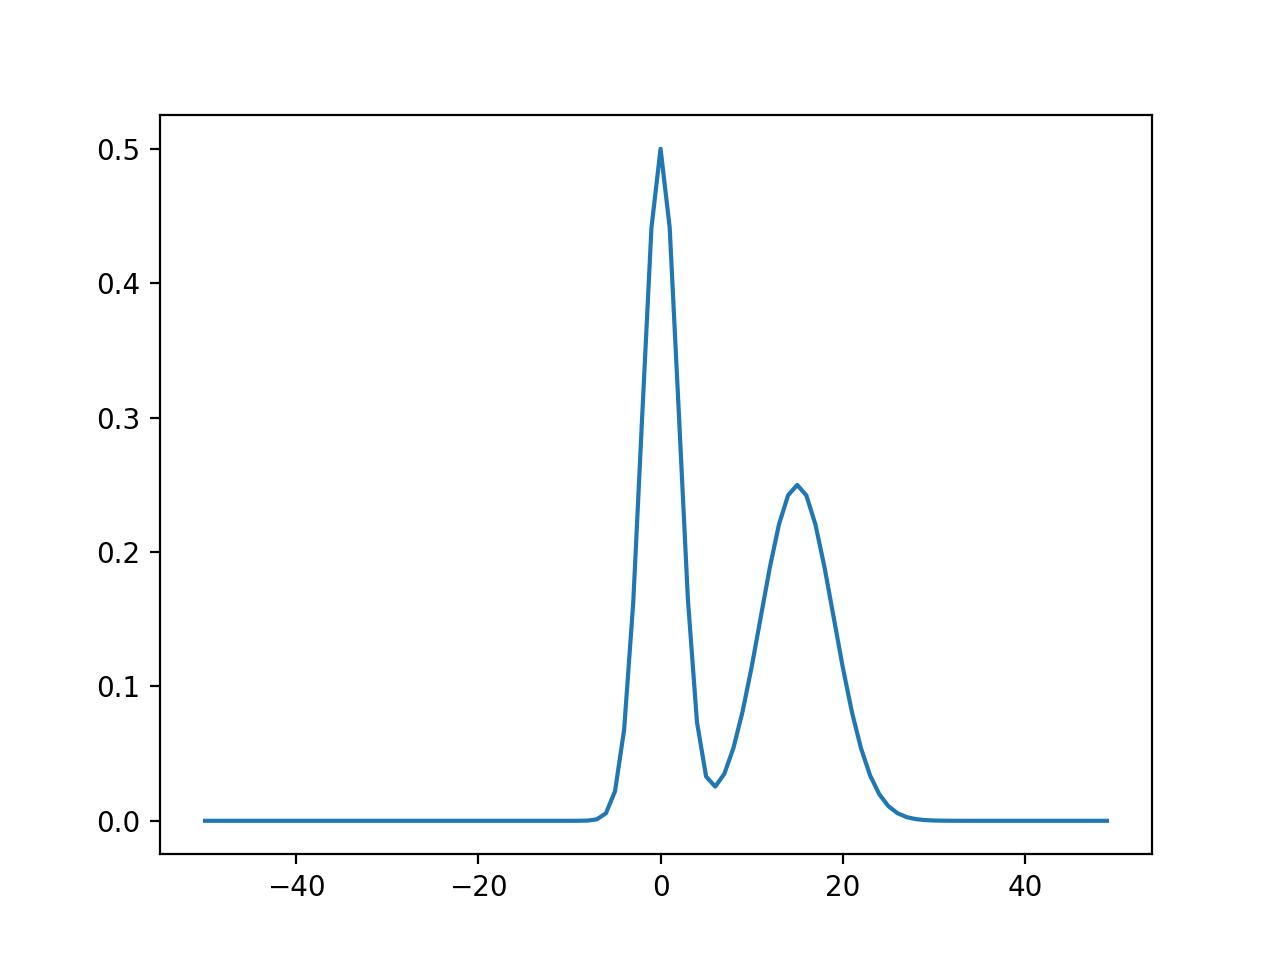

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


0.7627165506353992
5.0132565492620005 5.013256549262001


In [3]:
Nt = 100
t = np.arange(Nt)-Nt/2.
wf = 2 # width of f
wg = 4 # width of g
f = (1/wf)*np.exp(-t**2/(2*wf**2))
shift = 2.5*(wf+wg)
g = (1/wg)*np.exp(-(t-shift)**2/(2*wg**2))
plt.figure()
plt.plot(t,f+g,'-')

fx = peaklet.pkxform(f)
gx = peaklet.pkxform(g)
fgx = peaklet.pkxform(f+g)

print(1-Delta1N(fgx.xform,gx.xform+fx.xform))
print(np.sum(fgx.xform), np.sum(gx.xform+fx.xform))

In [4]:
def psplot(pkobj,dt=1.0,tunit='samples',punit='counts'):
    """
    Calculate and plot multiscale power spectrum.
    
    pkobj = PeakletXform object
    dt = sample period (default 1)
    tunit = unit of the time (sampling) axis (default 'samples')
    punit = unit of the light curve (default 'counts')
    """
    timescales = pkobj.scales*dt
    ps = np.sum(pkobj.xform,1)
    plt.semilogx(timescales, ps, '-o')
    plt.xlabel('scale ('+tunit+')')
    plt.ylabel('power ('+punit+')')
    return ps, timescales

<IPython.core.display.Javascript object>


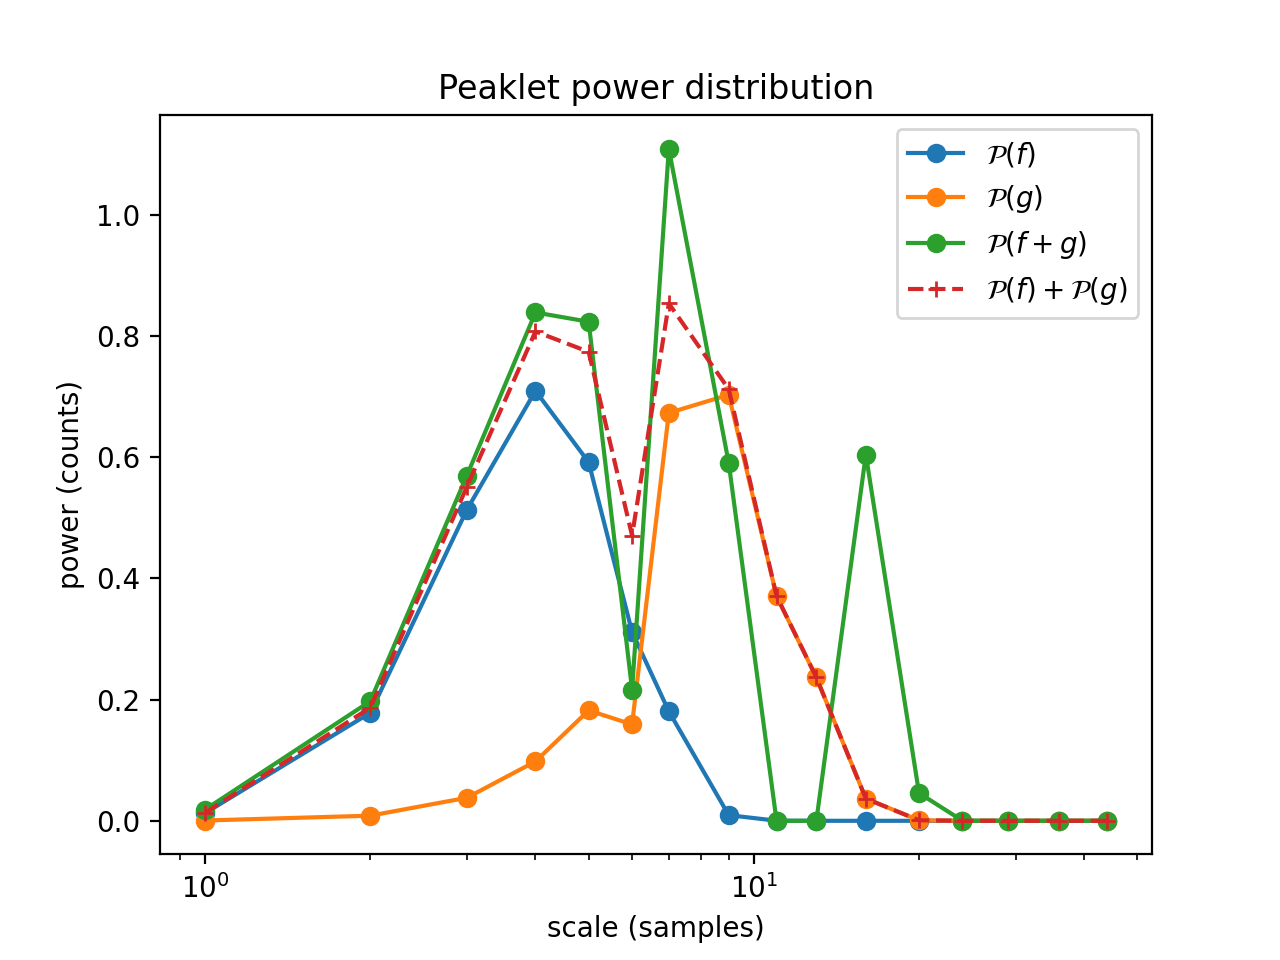

In [5]:
plt.figure()
ps = psplot(fx)
ps = psplot(gx)
ps = psplot(fgx)
plt.plot(fx.scales, np.sum(fx.xform+gx.xform,1),'+--')

plt.legend([r'$\mathcal{P}(f)$',r'$\mathcal{P}(g)$',r'$\mathcal{P}(f+g)$','$\mathcal{P}(f)+\mathcal{P}(g)$'])
plt.title('Peaklet power distribution');

In [6]:
######## LINEARITY CONTOUR PLOT ##########


Nt = 1000
t = np.arange(Nt) - Nt/2.
wf = 2**np.linspace(-2,8,num=200) # width of f
wg = 8                            # width of g
nshift = np.linspace(-5, 5, num=200)

wfarr, nsarr, tarr = np.meshgrid(wf,nshift,t)

f = (1/wfarr)*np.exp( -tarr**2 / (2*wfarr**2) )

g = (1/wg)*np.exp( -(tarr - nsarr*(wfarr+wg))**2 / (2*wg**2) )


In [7]:
import multiprocessing as mp
print("Number of processors: ", mp.cpu_count())

Number of processors:  8


In [8]:
t_0 = time.perf_counter()
fx = peaklet.pkxform(f)
t_f = time.perf_counter()
print('transformed f array, ',f.shape, ', in ',t_f-t_0,'s.')
gx = peaklet.pkxform(g)
t_g = time.perf_counter()
print('transformed g array, ',g.shape, ', in ',t_g-t_f,'s.')
fgx = peaklet.pkxform(f+g)
t_fg = time.perf_counter()
print('transformed f+g array in ',t_fg-t_g,'s.')
print('transform shape is ', fx.xform.shape)

transformed f array,  (200, 200, 1000) , in  218.1238921729382 s.
transformed g array,  (200, 200, 1000) , in  242.52842020604294 s.
transformed f+g array in  601.4231527679367 s.
transform shape is  (28, 200, 200, 1000)


<IPython.core.display.Javascript object>


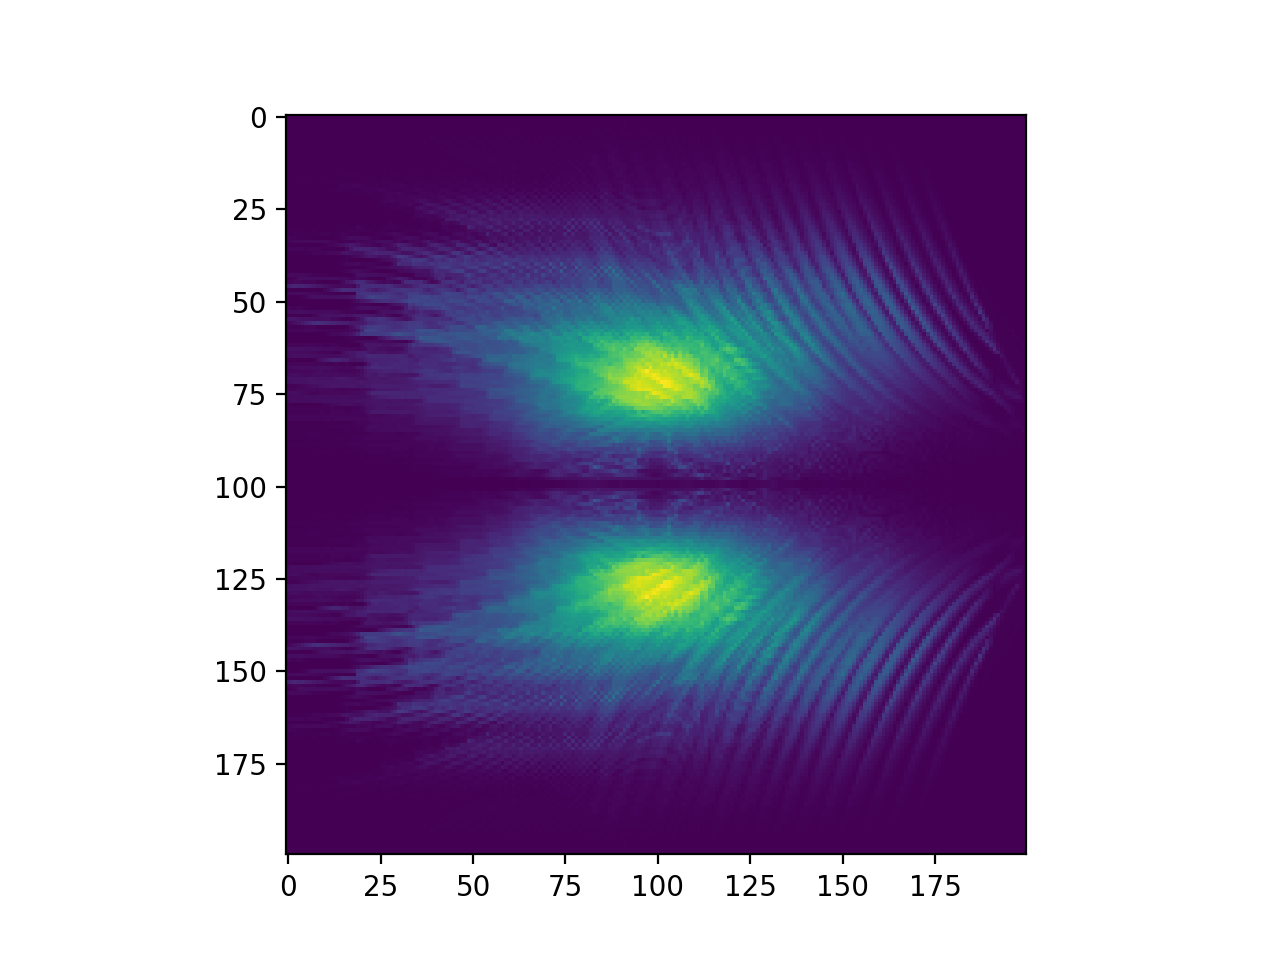

In [9]:
nonlinearity = np.sum(np.abs(fx.xform+gx.xform-fgx.xform),axis=(0,-1))/np.sum(fx.xform+gx.xform+fgx.xform,axis=(0,-1))
plt.figure()
plt.imshow(nonlinearity)


<IPython.core.display.Javascript object>


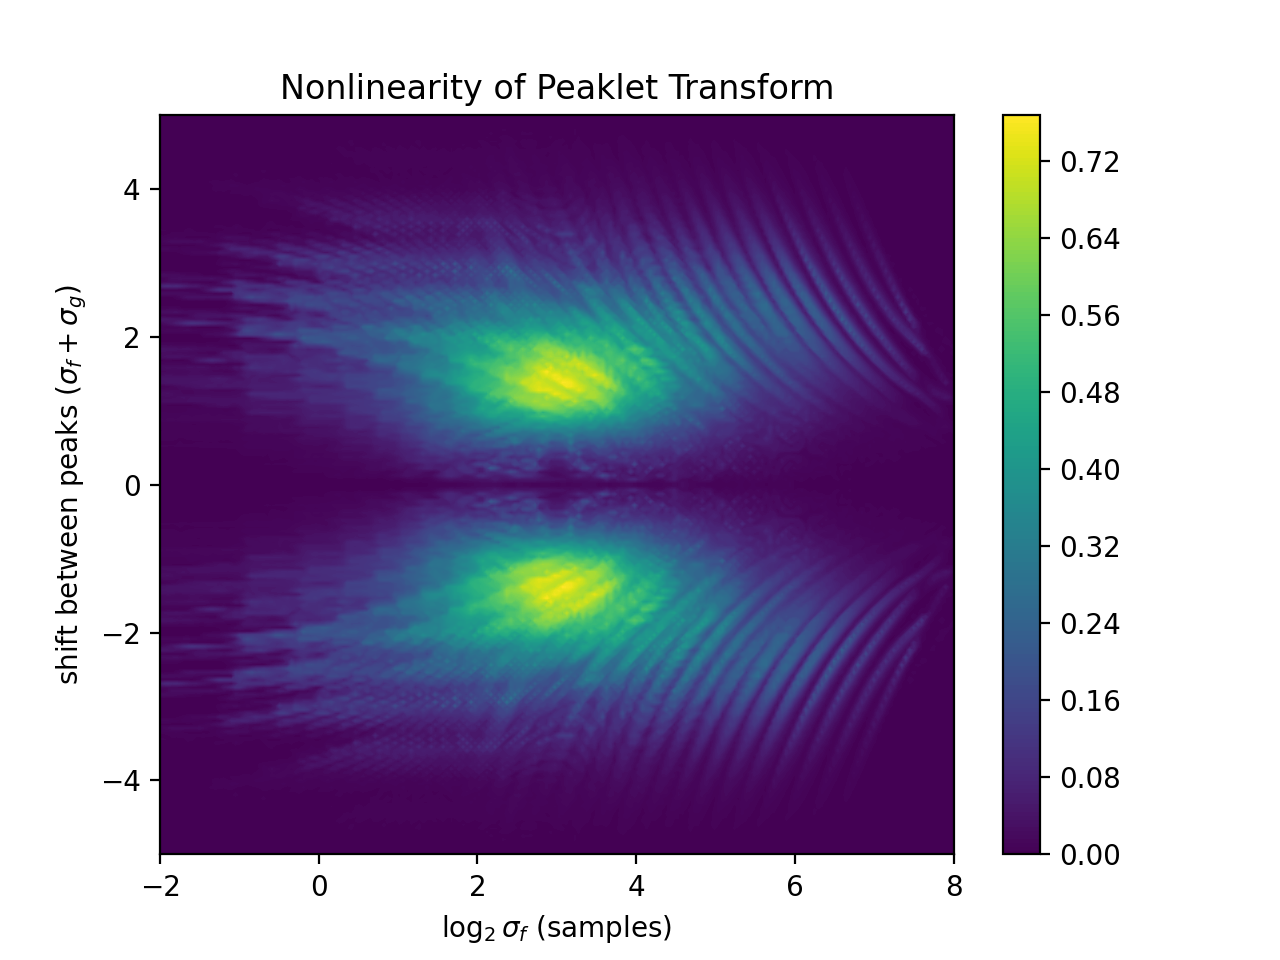

In [10]:
plt.figure()
plt.contourf(np.log2(wf),nshift,nonlinearity, levels=200)
plt.colorbar()
plt.title('Nonlinearity of Peaklet Transform')
plt.xlabel(r'$\log_2 \sigma_f$ (samples)')
plt.ylabel(r'shift between peaks ($\sigma_f+\sigma_g$)')
plt.show()